In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [0]:
from google.colab.patches import cv2_imshow

In [0]:
!pip install wand
!apt-get install libmagickwand-dev

In [0]:
!pip install --upgrade scikit-image
!pip install --upgrade imutils


In [0]:
!apt install tesseract-ocr
!apt install libtesseract-dev

In [0]:
pip install pytesseract


In [0]:
from google.colab import files
files.upload()

In [5]:
!ls

'contrato2 (1)_page-0001.jpg'   contrato2_page-0001.jpg   sample_data


In [0]:
from PIL import Image
import pytesseract
import cv2

In [0]:
# load the example image and convert it to grayscale
#No preprocessing required here as the results are fairly good.
text = pytesseract.image_to_string(Image.open('contrato2_page-0001.jpg'))
text2 = pytesseract.image_to_string(Image.open('contrato2 (1)_page-0001.jpg'))

In [6]:
len(text), len(text2)

(2539, 2542)

In [8]:
print(text)

CONTRATO DE CONFIDENCIALIDAD QUE CELEBRAN POR UNA PARTE ARIABATA
CONSULTING S.C., REPRESENTADA EN ESTE ACTO POR EL SENOR HETOR DANIEL
DOBERNARDO, EN LO SUCESIVO DENOMINADA “LA EMPRESA", Y POR LA OTRA, POR
SU PROPIO DERECHO, , EN LO SUCESIVO
DENOMINADO "EL PROFESIONAL", AL TENOR DE LAS SIGUIENTES DECLARACIONES Y
CLAUSULAS:

DECLARACIONES
|. Declara EL PROFESIONAL por su propio derecho:

A. Ser una persona fisica en pleno uso de sus capacidades para celebrar el presente
contrato, haber nacido en la ciudad de México el dia 22 de Julio de 1995, tener
nacionalidad mexicana, con domicilio en Valle de los Olmos 17 y estar inscrita en el
Registro Federal de Contribuyentes bajo la clave SAGS36926

B. Haber cursado la carrera de Ingenieria Industrial y, consecuentemente, contar con los
conocimientos propios de su carrera profesional.

C. Que es su deseo colaborar como asesor de clientes de LA EMPRESA, actividad que por
su naturaleza supone el acceso a la INFORMACION CONFIDENCIAL propiedad
exclus

In [15]:
!python -m spacy download es_core_news_md

    100% |████████████████████████████████| 98.5MB 107.7MB/s 
  Running setup.py install for es-core-news-md ... done

    Linking successful
    /usr/local/lib/python3.6/dist-packages/es_core_news_md -->
    /usr/local/lib/python3.6/dist-packages/spacy/data/es_core_news_md

    You can now load the model via spacy.load('es_core_news_md')



In [0]:
import spacy

In [0]:
nlp = spacy.load("es_core_news_md")

In [18]:
doc1 = nlp(text)
doc2 = nlp(text2)

doc1.similarity(doc2)

0.9999928066016567

In [0]:
# import the necessary packages
from skimage.measure import compare_ssim
import argparse
import imutils

In [0]:
# load the two input images
imageA = cv2.imread("contrato2_page-0001.jpg")
imageB = cv2.imread("contrato2 (1)_page-0001.jpg")
 
# convert the images to grayscale
grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)

In [21]:
# compute the Structural Similarity Index (SSIM) between the two
# images, ensuring that the difference image is returned
(score, diff) = compare_ssim(grayA, grayB, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.97644514771722


In [0]:
# threshold the difference image, followed by finding contours to
# obtain the regions of the two input images that differ
thresh = cv2.threshold(diff, 0, 255,
	cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

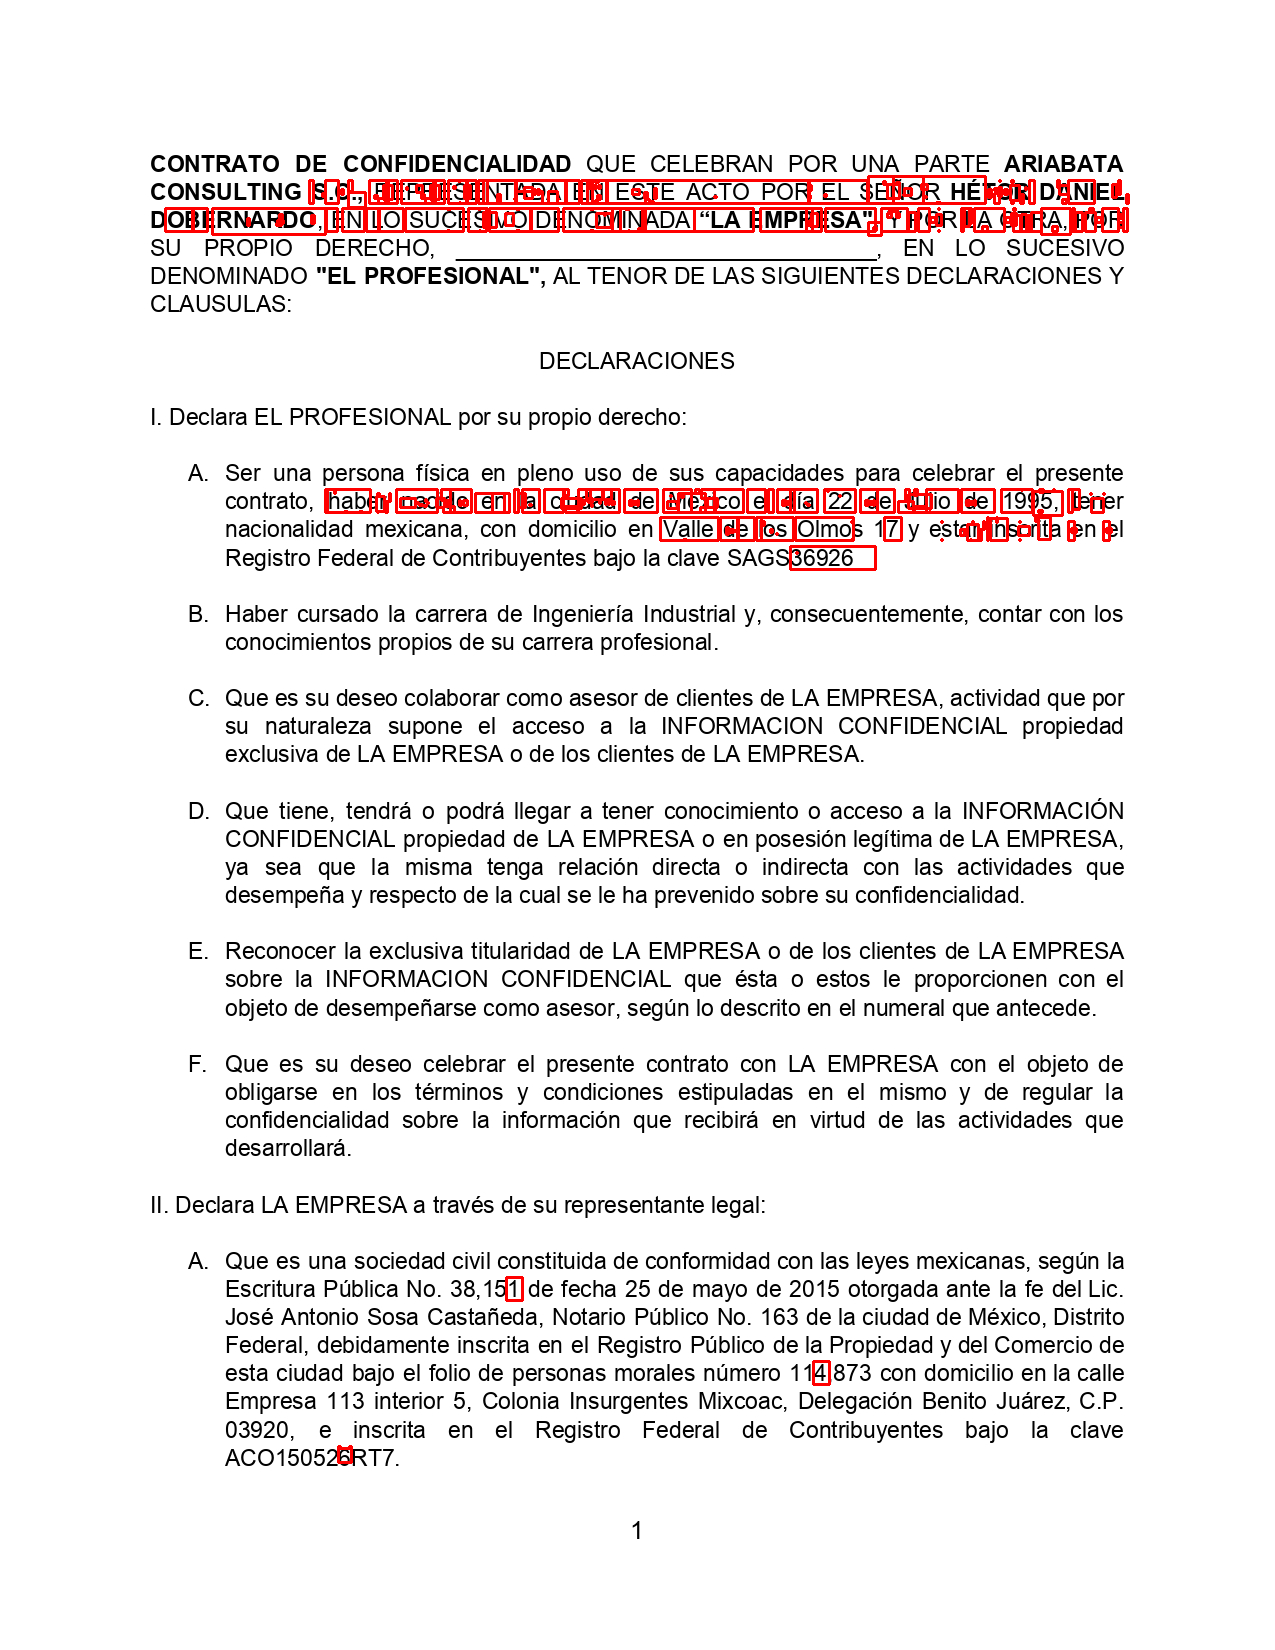

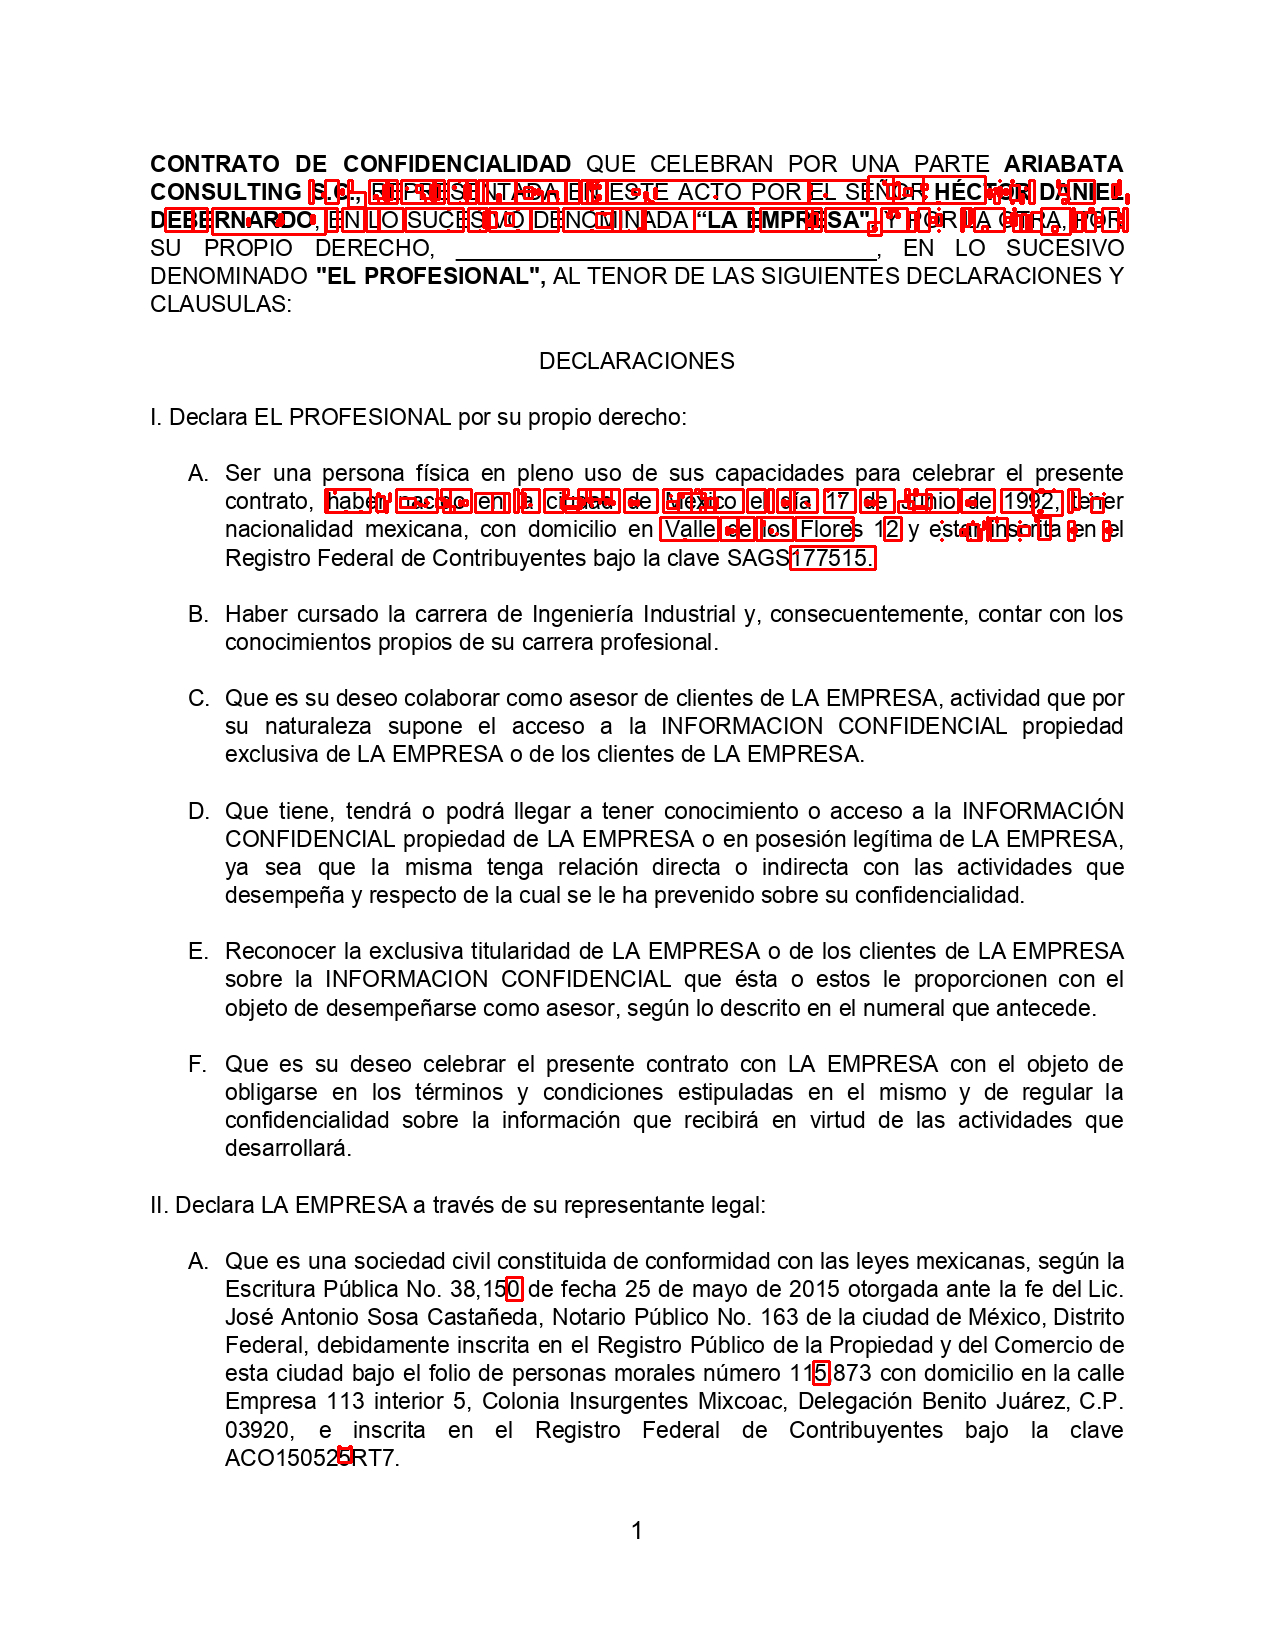

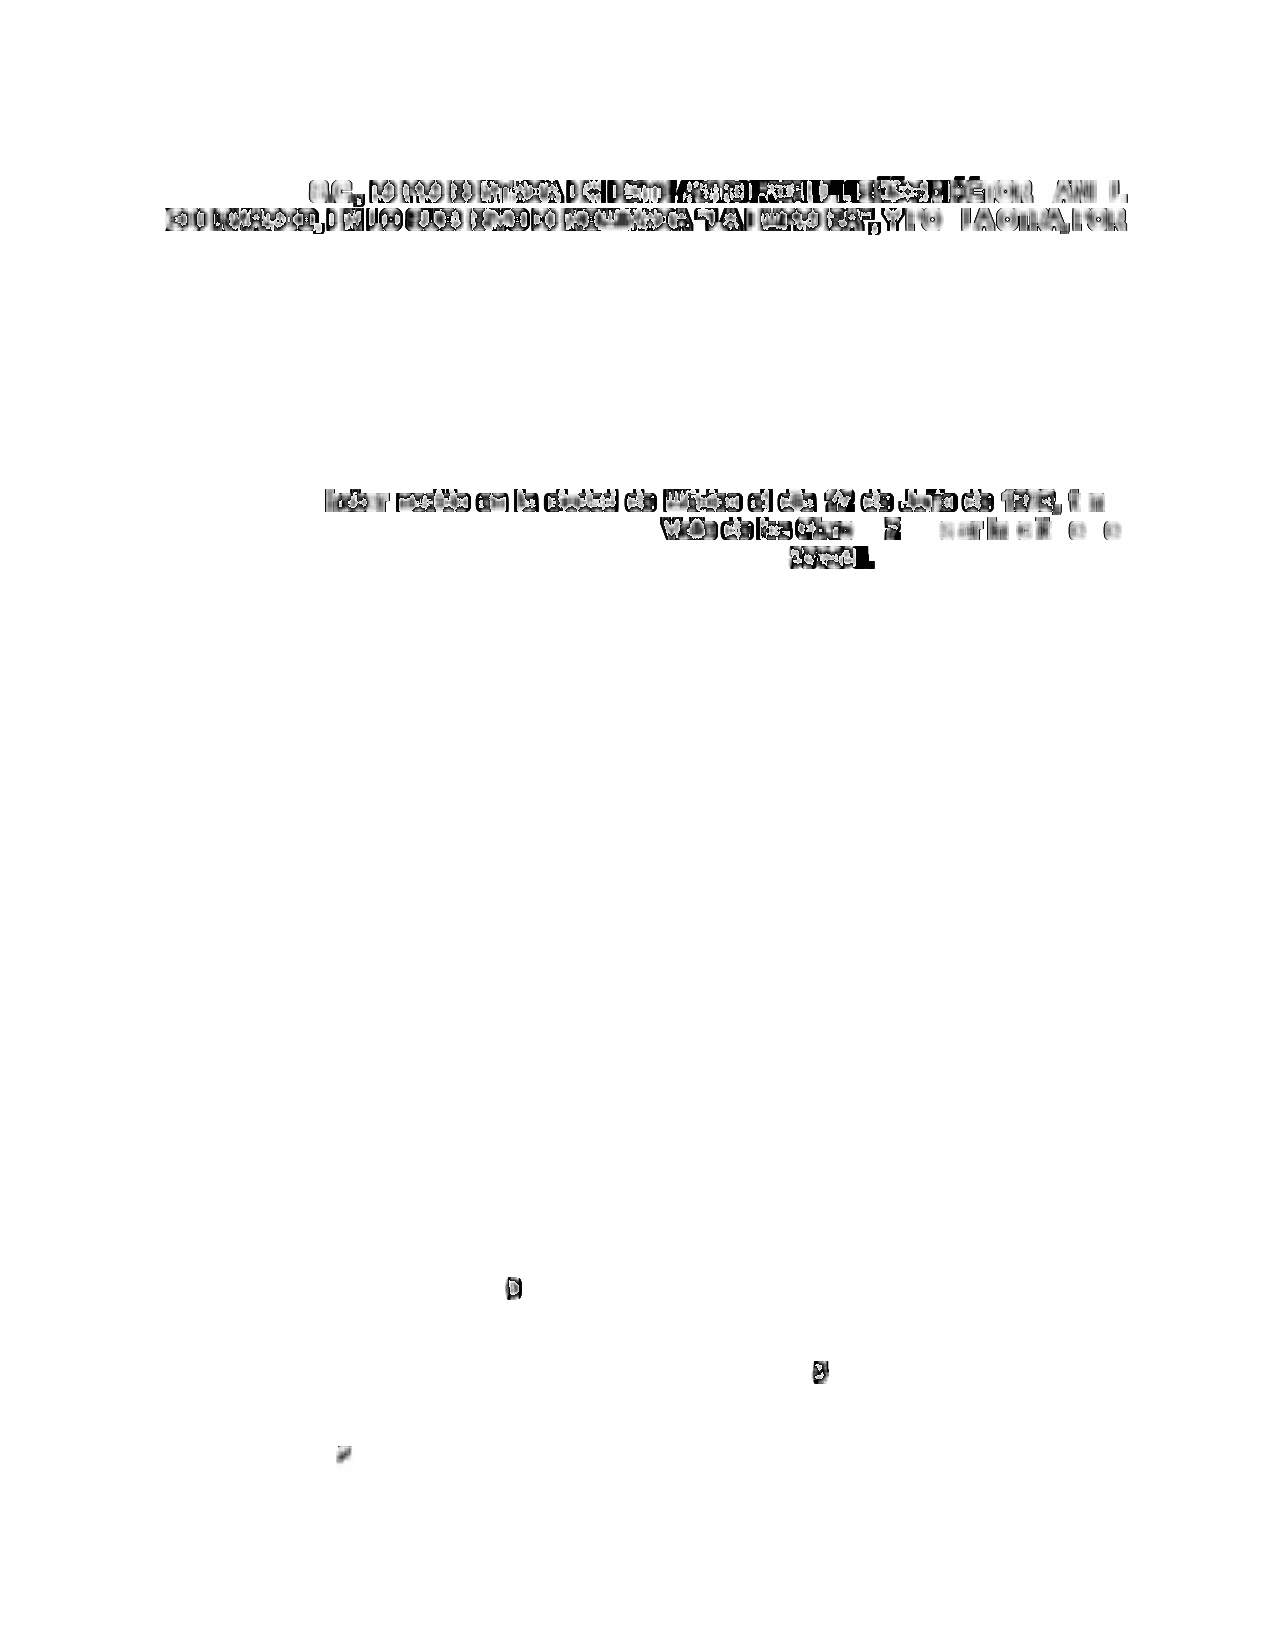

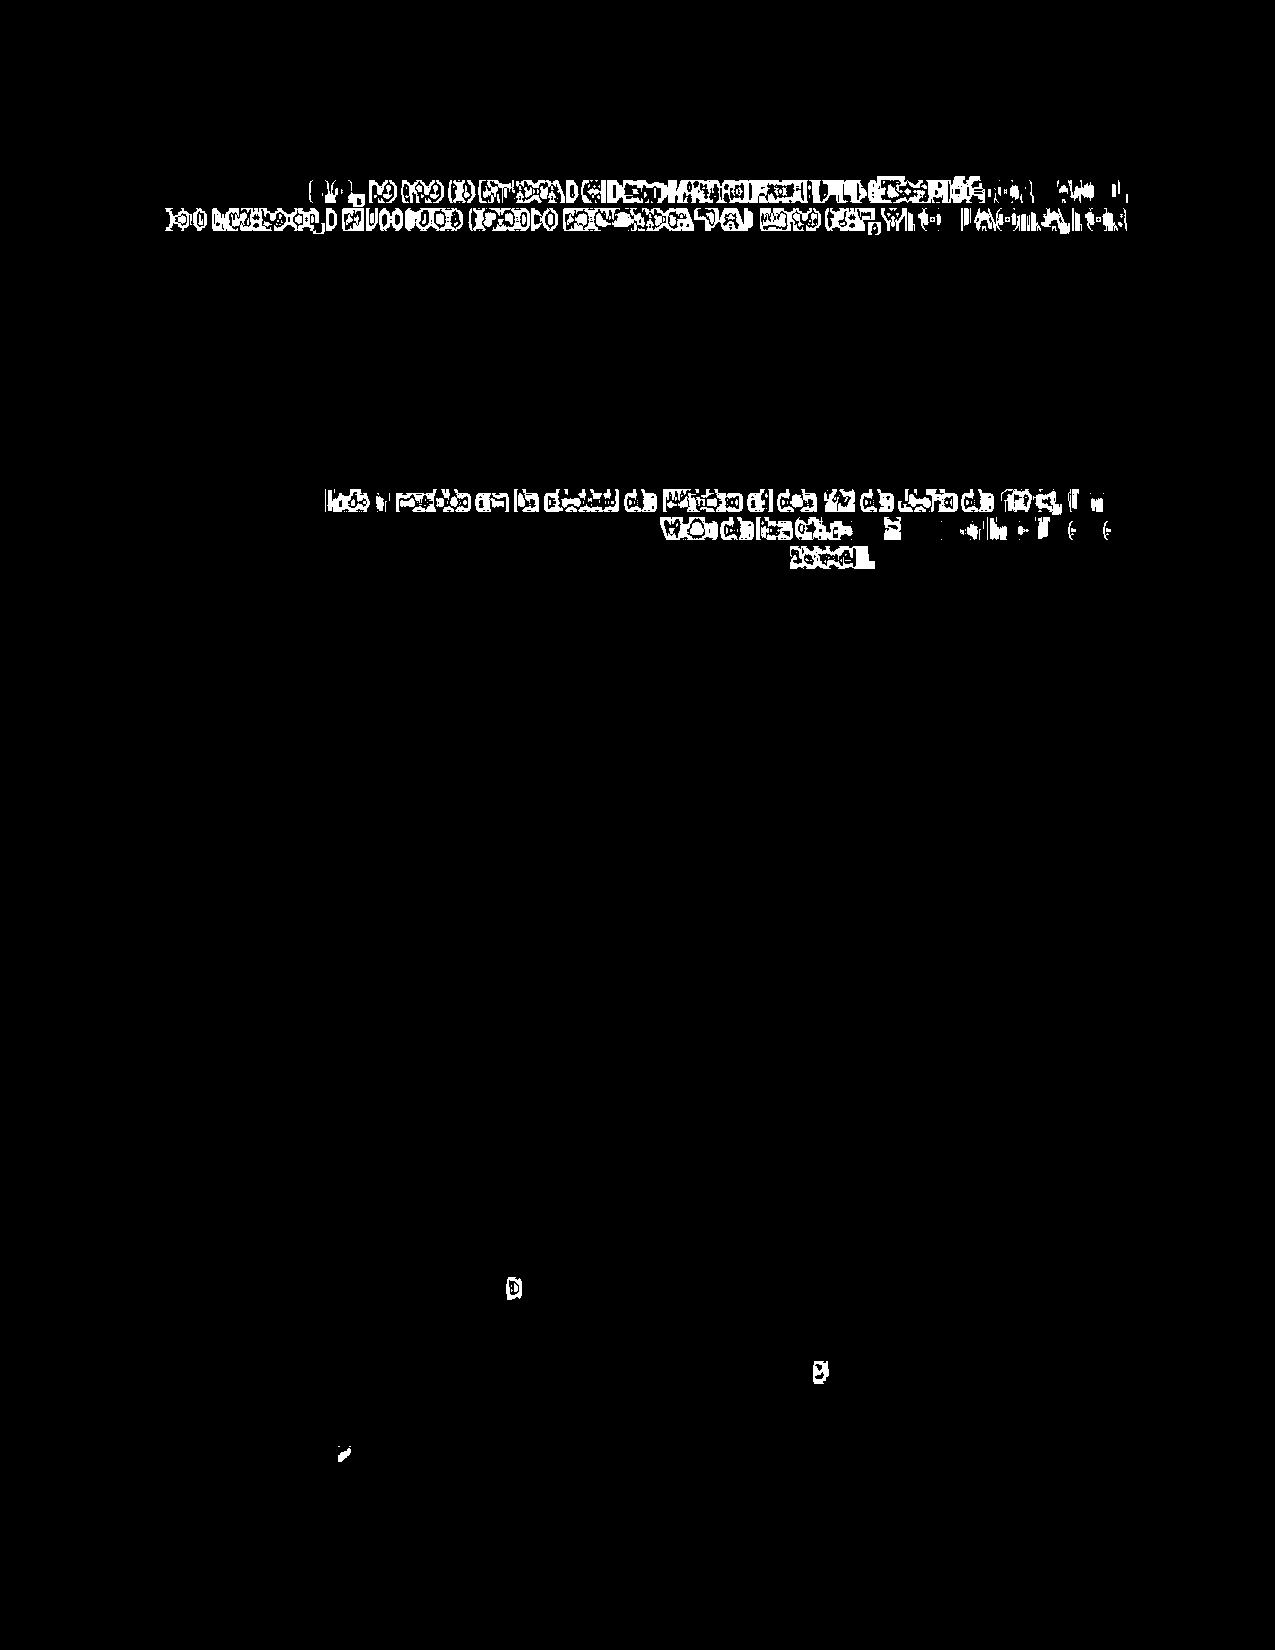

In [23]:
for c in cnts:
	# compute the bounding box of the contour and then draw the
	# bounding box on both input images to represent where the two
	# images differ
	(x, y, w, h) = cv2.boundingRect(c)
	cv2.rectangle(imageA, (x, y), (x + w, y + h), (0, 0, 255), 2)
	cv2.rectangle(imageB, (x, y), (x + w, y + h), (0, 0, 255), 2)
#show the output images
cv2_imshow(imageA)
cv2_imshow(imageB)
cv2_imshow(diff)
cv2_imshow(thresh)

In [0]:
grayA.size

In [0]:
grayB.size

In [0]:
(H, W) = grayA.shape
# to resize and set the new width and height 
grayB = cv2.resize(grayB, (W, H))

In [0]:
imageA.shape

(1650, 1275, 3)